# Fraud Detection with Random Forest
Most transactions that a credit card company will process are valid transactions. However, a select few of these transactions are actually fradulent and need to be identified as accurately as possible to ensure that customers have there identity secure. The imbalance between valid and fraud transactions requires some extra preprocessing along with the appropriate model to properly make a model. Assuming we have a labeled data set we can apply an ensemble method such as Random Forest to help us identify fraudulent transactions based the provided features

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn

In [2]:
print(f'Python: {sys.version}')
print(f'Numpy: {np.version}')
print(f'Pandas: {pd.__version__}')
print(f'Matplotlib: {matplotlib.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Sklearn: {sklearn.__version__}')

Python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Numpy: <module 'numpy.version' from 'C:\\Users\\ajgal\\AppData\\Roaming\\Python\\Python38\\site-packages\\numpy\\version.py'>
Pandas: 1.2.4
Matplotlib: 3.3.4
Seaborn: 0.11.1
Sklearn: 0.24.2


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Credit Card dataset
The following dataset has been dimensionally reduced using PCA to protect the confidentiality of the data as these values are from real-world data.

In [4]:
data = pd.read_csv('data/creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploring the Data

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data.shape

(284807, 31)

In [8]:
#The data seems to require normalization prior to applying a model
data.max()

Time      172792.000000
V1             2.454930
V2            22.057729
V3             9.382558
V4            16.875344
V5            34.801666
V6            73.301626
V7           120.589494
V8            20.007208
V9            15.594995
V10           23.745136
V11           12.018913
V12            7.848392
V13            7.126883
V14           10.526766
V15            8.877742
V16           17.315112
V17            9.253526
V18            5.041069
V19            5.591971
V20           39.420904
V21           27.202839
V22           10.503090
V23           22.528412
V24            4.584549
V25            7.519589
V26            3.517346
V27           31.612198
V28           33.847808
Amount     25691.160000
Class          1.000000
dtype: float64

In [9]:
data.min()

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

In [10]:
data['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [11]:
#we will remove 'Time' as we are not using time to identify the qualities of a fraudulent transaction
data.drop('Time',axis=1,inplace=True)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
#Checking for Missing Values
data.isnull().value_counts()

V1     V2     V3     V4     V5     V6     V7     V8     V9     V10    V11    V12    V13    V14    V15    V16    V17    V18    V19    V20    V21    V22    V23    V24    V25    V26    V27    V28    Amount  Class
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False   False    284807
dtype: int64

<AxesSubplot:>

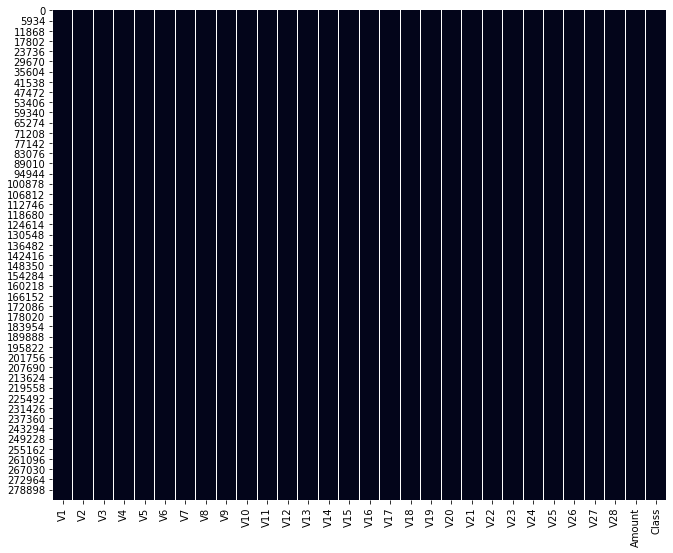

In [13]:
plt.subplots(figsize=(11,9))
sns.heatmap(data.isnull(), cbar=False)

<AxesSubplot:xlabel='Class', ylabel='count'>

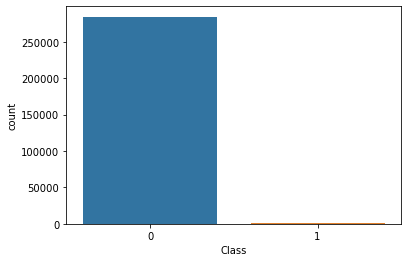

In [14]:
#Checking for Imbalanced Dataset
sns.countplot(x='Class',data=data)

In [15]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Scaling and Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#scaling the dataset
scaler = StandardScaler()
data_normal = scaler.fit_transform(data.drop('Class',axis=1))

In [18]:
col_names = list(data.columns)
col_names.pop()
col_names

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [19]:
df_scaled = pd.DataFrame(data_normal, columns=col_names)

In [20]:
df_class = pd.DataFrame(data['Class'])

In [21]:
data_scaled = pd.concat([df_scaled,df_class], axis=1, join='inner')

In [22]:
train, val = train_test_split(data_scaled, test_size=0.2, random_state=42)

In [23]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,0.998136,-0.230595,-0.207758,0.233183,-0.369046,-0.064700,-0.507624,0.030137,0.959887,-0.027957,...,0.324289,1.334304,0.085207,-0.460007,-0.086325,-0.449541,0.111905,-0.142827,-0.313289,0
165061,-0.204716,-0.379665,1.025778,-1.425115,-0.078079,0.126334,0.014517,-0.336266,0.036753,0.561249,...,-0.208959,0.581097,0.181664,-1.657891,-2.257331,0.750528,-0.917839,-0.438653,-0.169717,0
238186,0.037019,0.496919,-0.370223,-0.501387,0.782760,-0.269788,0.636863,0.098192,-0.119490,-0.586144,...,-0.428357,-1.202920,0.133541,0.244662,-0.827696,0.248202,0.511344,0.212940,-0.305292,0
150562,-0.273165,0.614415,1.154609,1.955969,0.362319,0.752303,0.685400,-0.068090,0.338220,0.514852,...,0.086485,0.611038,-0.116507,0.740024,-1.256918,-0.375422,-0.230441,-0.196713,0.116306,0
138452,-2.055932,1.149012,-0.283453,-0.020886,-0.620000,-0.360593,-0.352142,1.099978,0.487920,1.122054,...,-0.654427,-0.317444,0.401495,0.109633,0.903141,0.508756,0.710805,-0.977550,-0.250239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.599118,0.061038,0.323503,0.326017,-0.214728,-0.160001,-0.133583,0.099821,-0.103946,0.072671,...,-0.253262,-0.791350,0.258472,-0.010138,0.175424,0.226522,-0.051835,0.012020,-0.345313,0
259178,-0.396173,0.087218,-0.753436,-0.876575,1.405808,2.936401,-0.376776,1.139213,0.364724,-0.600662,...,0.050479,-0.026974,0.387264,1.127424,-3.136737,-1.598712,0.163531,0.415216,0.003520,0
131932,-0.074850,0.601310,1.005500,0.343093,0.253077,-0.611887,0.870300,-0.330988,-0.447196,-0.195393,...,0.071678,0.487927,-0.466320,0.665156,0.455388,-0.826308,-0.300123,-0.594382,-0.337477,0
146867,-1.505412,1.426053,-1.662785,-2.683097,1.352153,2.047406,-0.381353,1.856688,0.528112,-0.025322,...,-0.453028,-1.443453,0.229520,1.120901,0.613320,0.884044,1.231103,1.017386,-0.349231,0


# Dealing with Imbalanced data
The key to dealing with an imbalanced dataset is to "artificially balance" the data. We can do this by using a number of methods including *synthetic data* which are datapoints created to emulate the real-world data. However, in this case we will be using *resampling* which simply repeats cases within the "minority" class until we've reached the desired amount of datapoints. In practice, resampling usually has a better result than synthetic data when balancing the dataset. In addition to resampling the minority class (*fraud*) we will also reduce the number of samples from the majority class since there are excessively more datapoints than needed. Technically, we are *upsampling* the minority and *downsampling* the majority class

In [24]:
train_valid = train[train['Class']==0]
train_fraud = train[train['Class']==1]

In [25]:
from sklearn.utils import resample
train_valid_downsampled = resample(train_valid,
                                 replace=False,
                                 n_samples=50000,
                                 random_state=42)

train_fraud_upsampled = resample(train_fraud,
                               replace=True,
                               n_samples=50000,
                               random_state=42)

In [26]:
train_balanced = pd.concat([train_valid_downsampled,train_fraud_upsampled])

In [27]:
train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 106396 to 16415
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      100000 non-null  float64
 1   V2      100000 non-null  float64
 2   V3      100000 non-null  float64
 3   V4      100000 non-null  float64
 4   V5      100000 non-null  float64
 5   V6      100000 non-null  float64
 6   V7      100000 non-null  float64
 7   V8      100000 non-null  float64
 8   V9      100000 non-null  float64
 9   V10     100000 non-null  float64
 10  V11     100000 non-null  float64
 11  V12     100000 non-null  float64
 12  V13     100000 non-null  float64
 13  V14     100000 non-null  float64
 14  V15     100000 non-null  float64
 15  V16     100000 non-null  float64
 16  V17     100000 non-null  float64
 17  V18     100000 non-null  float64
 18  V19     100000 non-null  float64
 19  V20     100000 non-null  float64
 20  V21     100000 non-null  float64
 21  V22   

In [28]:
train_balanced.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
106396,0.655648,-0.303677,-0.235471,-1.486876,-0.318031,-0.756759,0.078350,-0.247361,1.757172,-1.504425,...,-0.275574,-0.541909,-0.332535,-0.670019,1.567732,-1.765457,0.147081,0.071628,-0.125298,0
238046,0.079341,-0.023818,-0.371595,-0.337713,0.713986,0.645005,0.467172,0.317881,0.021823,-0.368429,...,0.690491,1.937063,0.220528,-2.368515,-0.999696,-0.102292,0.121640,-0.092600,-0.003277,0
107344,0.579916,0.018139,0.213075,0.800421,-0.126470,0.003435,-0.119873,0.051881,0.257640,0.012740,...,0.266571,0.762727,-0.341338,-0.701531,1.229444,-0.260052,0.084639,0.064992,-0.178673,0
274061,1.017430,0.087677,-1.067633,0.995923,0.270666,-0.865005,0.519415,-0.336997,0.235010,0.239608,...,0.077123,0.458734,-0.021464,-0.028584,0.840665,-1.016408,-0.051189,-0.180707,-0.245281,0
271673,-0.196790,0.407454,0.651174,-0.670217,0.536490,-0.112661,0.869230,-0.234387,0.336879,-0.739347,...,0.011455,0.423437,-0.909289,1.084801,2.035317,0.561785,-0.965423,-0.908920,-0.313249,0


<AxesSubplot:xlabel='Class', ylabel='count'>

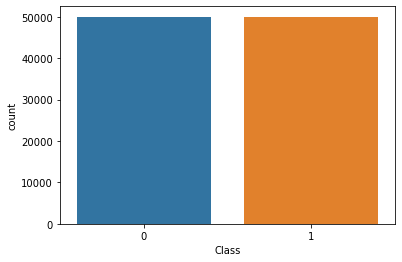

In [29]:
#balanced dataset after resampling
sns.countplot(x='Class',data=train_balanced)

# Random Forest
We choose the random forest algorithm as its hierarchical structure is well-suited to the task of an imbalanced dataset. Other potential alternatives are generally other semi-related ensemble methods such as the gradient boost family of algorithms including adaboost. Random Forest is an efficient and simple algorithm to run that has a reputation of strong performance on this very task

In [30]:
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier()

## Hyperparameter Tuning
We will need to select from a number of hyperparameters for [Random Forest](https://tinyurl.com/random-forest-sklearn). The most important of which are as follows:

* **n_estimators**: The number of trees in the forest.
* **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* **min_samples_split**: The minimum number of samples required to split an internal node
* **min_samples_leaf**: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

To help us select appropriate hyperparameter settings we will use **RandomizedSearchCV** to quickly run through a number of parameters. We will then follow-up this process using **GridSearchCV** in a more focused hyperparameter search

In [31]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [32]:
rand_range = [i for i in range(2,11)]

param_distributions = {'n_estimators':rand_range,
                       'max_depth':rand_range,
                       'min_samples_split':rand_range,
                       'min_samples_leaf':rand_range}

In [33]:
rand_grid = RandomizedSearchCV(estimator=randforest,
                               param_distributions=param_distributions,
                               n_iter=50,
                               cv=10,
                               random_state=42,
                               n_jobs=10,
                               verbose=2)

In [34]:
X_train = train_balanced.drop("Class", axis=1)
y_train = train_balanced["Class"]

In [35]:
%%time
rand_grid.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Wall time: 57.8 s


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=10,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10]},
                   random_state=42, verbose=2)

In [36]:
print(f'Best Estimator: {rand_grid.best_estimator_}\n')
print(f'Best Estimator: {rand_grid.best_params_}\n')
print(f'Best Score: {rand_grid.best_score_}')

Best Estimator: RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=10,
                       n_estimators=8)

Best Estimator: {'n_estimators': 8, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 10}

Best Score: 0.99413


In [37]:
rand_results = pd.DataFrame(rand_grid.cv_results_)
rand_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.772678,0.023890,0.011403,0.004229,7,7,3,3,"{'n_estimators': 7, 'min_samples_split': 7, 'm...",0.9307,...,0.9376,0.9337,0.9395,0.9318,0.9401,0.9378,0.9367,0.93653,0.003178,41
1,2.282662,0.050035,0.015801,0.002892,10,6,5,9,"{'n_estimators': 10, 'min_samples_split': 6, '...",0.9871,...,0.9828,0.9949,0.9899,0.9912,0.9906,0.9889,0.9938,0.99014,0.003398,8
2,1.836377,0.050873,0.013400,0.001960,8,6,3,9,"{'n_estimators': 8, 'min_samples_split': 6, 'm...",0.9838,...,0.9863,0.9917,0.9886,0.9933,0.9880,0.9898,0.9847,0.98921,0.003388,10
3,2.121192,0.048780,0.011701,0.002052,9,2,3,9,"{'n_estimators': 9, 'min_samples_split': 2, 'm...",0.9931,...,0.9918,0.9927,0.9853,0.9919,0.9924,0.9893,0.9899,0.99131,0.002413,5
4,0.609471,0.028817,0.007499,0.001858,3,7,3,7,"{'n_estimators': 3, 'min_samples_split': 7, 'm...",0.9680,...,0.9780,0.9765,0.9690,0.9734,0.9741,0.9735,0.9696,0.97303,0.003400,20


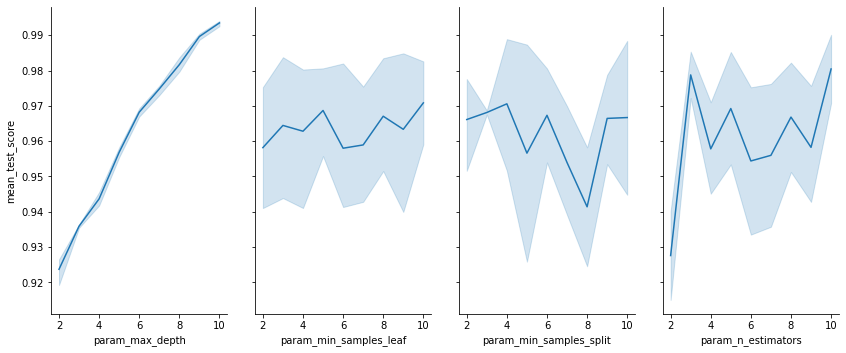

In [38]:
params = ['param_max_depth', 
          'param_min_samples_leaf', 
          'param_min_samples_split',
          'param_n_estimators']

g = sns.PairGrid(data=rand_results, x_vars=params,y_vars='mean_test_score',height=5, aspect=.6)
g.map(sns.lineplot)

In [39]:
max_depth = [i for i in range(8,12)]
min_samples_split = [5, 8, 10]
min_samples_leaf = [4, 6, 9, 10]
n_estimators = [3, 5, 8, 10]

param_grid = {'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'n_estimators':n_estimators,}

In [40]:
gridcv = GridSearchCV(estimator=randforest,
                      param_grid=param_grid,
                      cv=10,
                      n_jobs=10,
                      verbose=2)

In [41]:
%%time
gridcv.fit(X_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
Wall time: 5min 16s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_depth': [8, 9, 10, 11],
                         'min_samples_leaf': [4, 6, 9, 10],
                         'min_samples_split': [5, 8, 10],
                         'n_estimators': [3, 5, 8, 10]},
             verbose=2)

In [42]:
cv_results = pd.DataFrame(gridcv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.770576,0.009892,0.008866,0.001741,8,4,5,3,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.9891,...,0.9839,0.9819,0.9887,0.9883,0.9824,0.9699,0.9771,0.98175,0.005985,177
1,1.110764,0.018235,0.008755,0.001736,8,4,5,5,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.9870,...,0.9800,0.9810,0.9868,0.9829,0.9835,0.9806,0.9775,0.98241,0.003454,170
2,1.731496,0.037565,0.012847,0.001743,8,4,5,8,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.9823,...,0.9788,0.9881,0.9908,0.9818,0.9797,0.9852,0.9794,0.98339,0.003831,160
3,2.106929,0.034568,0.013668,0.002333,8,4,5,10,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.9859,...,0.9843,0.9863,0.9821,0.9849,0.9801,0.9856,0.9828,0.98416,0.002273,150
4,0.679191,0.019961,0.006776,0.001107,8,4,8,3,"{'max_depth': 8, 'min_samples_leaf': 4, 'min_s...",0.9808,...,0.9860,0.9800,0.9821,0.9747,0.9821,0.9804,0.9739,0.98082,0.003745,182


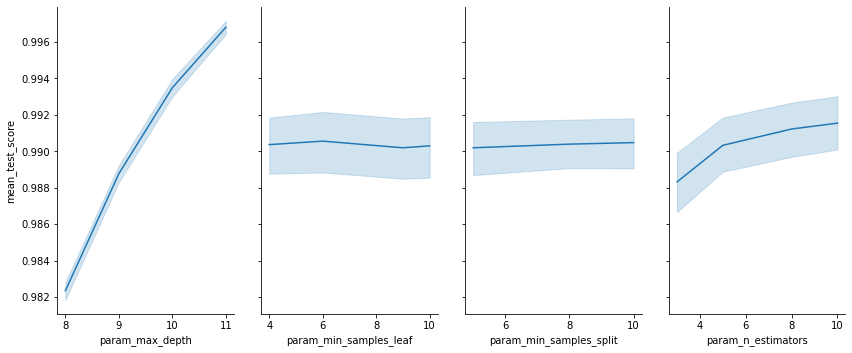

In [43]:
params = ['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators']

g = sns.PairGrid(data=cv_results, x_vars=params,y_vars='mean_test_score',height=5, aspect=.6)
g.map(sns.lineplot)

## Fitting a Final Model Using the Best Parameters

In [44]:
print(f'Best Estimator: {gridcv.best_estimator_}\n')
print(f'Best Parameters: {gridcv.best_params_}\n')
print(f'Best Score: {gridcv.best_score_}')

Best Estimator: RandomForestClassifier(max_depth=11, min_samples_leaf=9, min_samples_split=5,
                       n_estimators=10)

Best Parameters: {'max_depth': 11, 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 10}

Best Score: 0.9984299999999999


In [45]:
randforest = RandomForestClassifier(n_estimators=10,
                                    max_depth=11,
                                    min_samples_split=5,
                                    min_samples_leaf=6,
                                    random_state=42)

In [46]:
randforest.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=10, random_state=42)

In [47]:
X_test = val.drop("Class", axis=1)
y_test = val["Class"]

C:\Users\ajgal\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


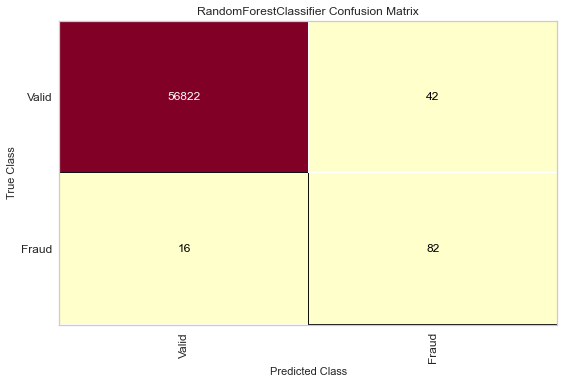

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [48]:
from yellowbrick.classifier import ConfusionMatrix
classes = ['Valid', 'Fraud']
label_encoder ={0:'Valid',1:'Fraud'}
cm = ConfusionMatrix(randforest, classes=classes, label_encoder=label_encoder)
cm.score(X_test,y_test)
cm.show()

In [49]:
from sklearn.metrics import classification_report
y_pred = randforest.predict(X_test)
target_names = ['Valid', 'Fraud']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56864
       Fraud       0.66      0.84      0.74        98

    accuracy                           1.00     56962
   macro avg       0.83      0.92      0.87     56962
weighted avg       1.00      1.00      1.00     56962



# Analyzing the Results
These results are encouraging in that most of the truly fraudulent cases were detected (82 of the total 98 cases of fraud within the validation set). We do have a number of false positives which ultimately leads to our 0.66 precision rating for fraud but what we really care about in this situation is the recall rate which sits at 0.84. **We would rather have a higher rate of false positives than false negatives when detecting fraud**. If there is a possibility of fraud it should be investigated. Our real focus first and foremost should be about improving how our model detects the 16 cases that it did not detect. If we were to imagine the recall rate as our overall grade for detection we might score a grade of "B-" (false positives still count as errors despite there relative importance to fraud detection.

# Next Steps

In this example we only used the RandomForest algorithm. Realistically, we would want to run several types of classification models and pit them against one another to determine which algorithm to move forward with. However, supposing we found that the RandomForest algorithm performed best, we would need to take a deeper dive into the data behind the 16 misclassified false negatives as well as some of the data behind the 42 misclassified false positives to see if we could determine some potential cause of the misclassifications. It should also be noted that since the data is encrpyted via PCA we may be missing some intricacies in the data. On the other hand, we may also need to dive deeper into which features are truly important to classifying transaction as valid or fraud.

# Analyzing Feature Importance

In [50]:
feat_import = gridcv.best_estimator_.feature_importances_

In [51]:
fi_dict = dict(feature=col_names, importance=feat_import)

In [52]:
df_importance = pd.DataFrame(fi_dict)
df_importance = df_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)

In [53]:
df_importance

,feature,importance
0,V14,0.325249
1,V11,0.144958
2,V12,0.098727
3,V3,0.071820
4,V4,0.054437
5,V10,0.050028
6,V2,0.048929
7,V18,0.035683
8,V17,0.025203
9,V19,0.017293


<AxesSubplot:xlabel='importance', ylabel='feature'>

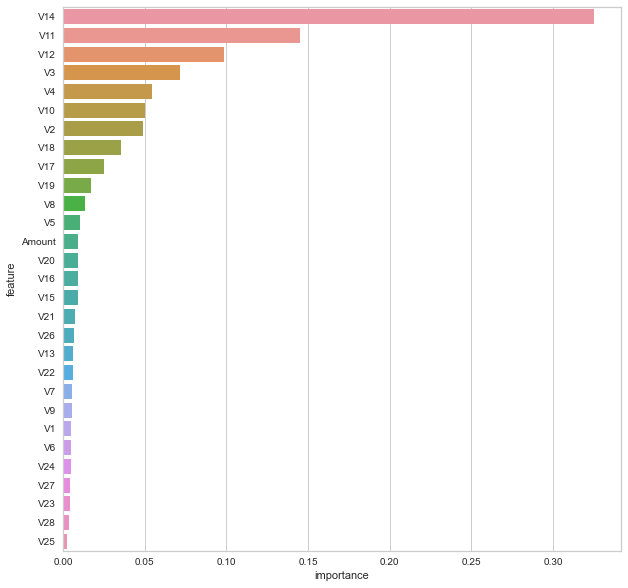

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="feature", data=df_importance)

# Investigating Misclassifications

In [55]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64

In [57]:
df_pred = pd.DataFrame(y_pred, columns=["pred"])
df_pred.head()

,pred
0,1
1,0
2,0
3,0
4,0


In [58]:
df_combined = pd.concat([y_test,df_pred], axis=1, join='inner')
df_misclass = df_combined[df_combined["Class"] != df_combined["pred"]].sort_values(by='pred', ascending=False)

In [59]:
df_misclass[df_misclass["pred"]==1].head(5)

,Class,pred
43900,0,1
50155,0,1
39995,0,1
8090,0,1
32949,0,1


In [60]:
misclassified_index = sorted(list(df_misclass.index))
print(misclassified_index)

[0, 6054, 6882, 6903, 8090, 8615, 9163, 9252, 11066, 11245, 11710, 11880, 12070, 15225, 15781, 15810, 16592, 16780, 17407, 19442, 19821, 20198, 20617, 21237, 21699, 22163, 28765, 28857, 31337, 32009, 32102, 32949, 36216, 36674, 37190, 37841, 39183, 39297, 39995, 40215, 41569, 42007, 42635, 42784, 43061, 43428, 43900, 44042, 44091, 44270, 45276, 50155, 53465, 55409, 55459]


In [61]:
misclassified_valid = sorted(list(df_misclass[df_misclass["Class"]==0].index))
misclassified_fraud = sorted(list(df_misclass[df_misclass["Class"]==1].index))

### Note:
* Correct Classifications notated in BLUE
* Misclassified Valid Points (False Positive) notated in GREEN
* Misclassified Fraud Points (False Negative) notated in RED

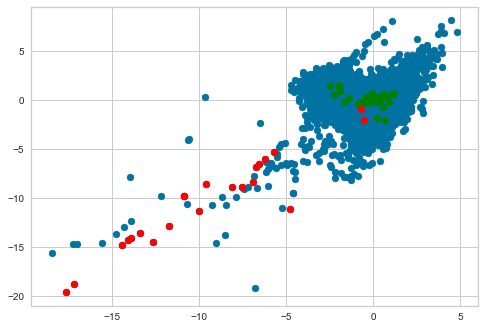

In [62]:
#V12 vs. V14
plt.scatter(X_test['V12'], X_test['V14']) #correctly identified blue points
plt.scatter(X_test['V12'].filter(items= misclassified_valid, axis=0),
             X_test['V14'].filter(items= misclassified_valid, axis=0), color='green') #misclassified true valid green points
plt.scatter(X_test['V12'].filter(items= misclassified_fraud, axis=0),
             X_test['V14'].filter(items= misclassified_fraud, axis=0), color='red') #misclassified true fraud red points

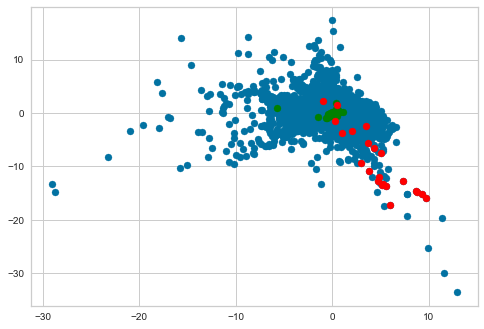

In [63]:
#V2 vs. V7
plt.scatter(X_test['V2'], X_test['V7']) #correctly identified blue points
plt.scatter(X_test['V2'].filter(items= misclassified_valid, axis=0),
             X_test['V7'].filter(items= misclassified_valid, axis=0), color='green') #misclassified true valid green points
plt.scatter(X_test['V2'].filter(items= misclassified_fraud, axis=0),
             X_test['V7'].filter(items= misclassified_fraud, axis=0), color='red') #misclassified true fraud red points

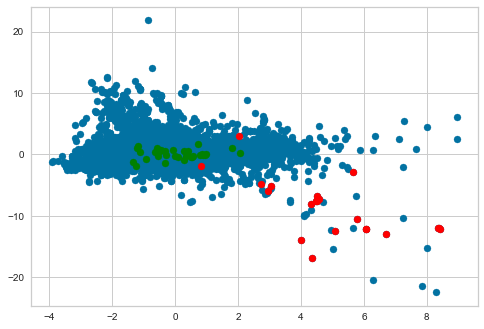

In [64]:
#V4 vs. V10
plt.scatter(X_test['V4'], X_test['V10']) #correctly identified blue points
plt.scatter(X_test['V4'].filter(items= misclassified_valid, axis=0),
             X_test['V10'].filter(items= misclassified_valid, axis=0), color='green') #misclassified true valid green points
plt.scatter(X_test['V4'].filter(items= misclassified_fraud, axis=0),
             X_test['V10'].filter(items= misclassified_fraud, axis=0), color='red') #misclassified true fraud red points

# New Insights

From some of the visualizations of the misclassifications from a few of the features we can see that the false positives seem to be clustered near the majority of the true valid transactions. The misclassied fraudulent cases (our false negatives) seem to be a mix of the some points closer to the majority of points and many times closer to the points further away from the main clusters.

We will attempt to run the algorithm one final time with fewer features to see if focusing on the features with the greatest importances will allow the algorithm to make better decisions.

In [65]:
bottom_feats = list(df_importance[10:]["feature"].values)

In [66]:
X_train_mod = X_train.drop(bottom_feats, axis=1)
X_test_mod = X_test.drop(bottom_feats, axis=1)

In [67]:
randforest2 = RandomForestClassifier(n_estimators=10,
                                    max_depth=11,
                                    min_samples_split=5,
                                    min_samples_leaf=6,
                                    random_state=42)

In [68]:
randforest2.fit(X_train_mod,y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=10, random_state=42)

C:\Users\ajgal\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


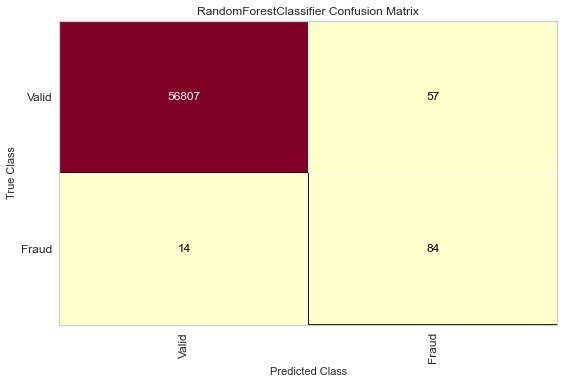

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [69]:
from yellowbrick.classifier import ConfusionMatrix
classes = ['Valid', 'Fraud']
label_encoder ={0:'Valid',1:'Fraud'}
cm = ConfusionMatrix(randforest2, classes=classes, label_encoder=label_encoder)
cm.score(X_test_mod,y_test)
cm.show()

In [70]:
from sklearn.metrics import classification_report
y_pred = randforest2.predict(X_test_mod)
target_names = ['Valid', 'Fraud']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

       Valid       1.00      1.00      1.00     56864
       Fraud       0.60      0.86      0.70        98

    accuracy                           1.00     56962
   macro avg       0.80      0.93      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# Conclusion

We can see that removing all but the top 10 features has seen an improvement to our recall but at the cost of our precision. We have identified 3 additional cases of fraud while misclassifying an additional 25 cases as fraud that were actually valid transactions. Considering the number of transactions that took place at 56797 we should consider whether or not a misclassification rate of approximately 0.001% (result from 67 divided by 56797) for false positives is acceptable for the company. There is a cost to any and all misclassifications and we would need to consult with others to determine what the best strategy ultimately is. 